<a href="https://colab.research.google.com/github/rhsrex/STATISTICS/blob/main/pima_regression_baseline_01_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-regression-baseline-01.ipynb)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [9]:
from google.colab import files
uploaded = files.upload()

# 업로드 후
import pandas as pd
df = pd.read_csv("diabetes.csv")


Saving diabetes.csv to diabetes.csv


In [130]:
df_insulin = pd.read_csv("data/diabetes_fill_insulin.csv")
df["Insulin"] = df_insulin["Insulin"]
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/diabetes_fill_insulin.csv'

In [131]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [133]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Insulin']]
X.shape

(768, 7)

In [134]:
y = df['Outcome']
y.shape

(768,)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [11]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
(df["Insulin"] > 0).value_counts()

,count
Insulin,
True,394
False,374


In [12]:
# train 세트를 만듭니다.

train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [13]:
# test 세트를 만듭니다.

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

## EDA

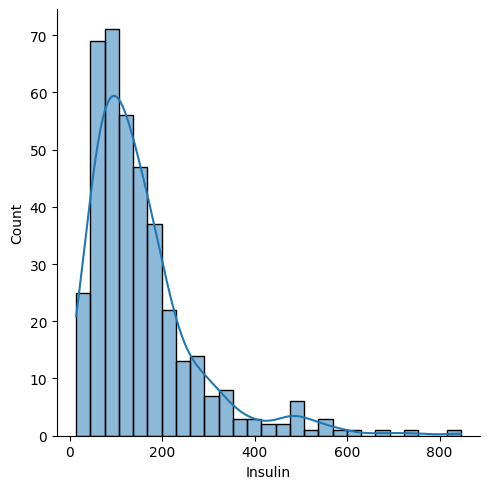

In [41]:
# sns.distplot(train["Insulin"])
sns.displot(data=train, x="Insulin", kde=True)

<Axes: xlabel='Insulin'>

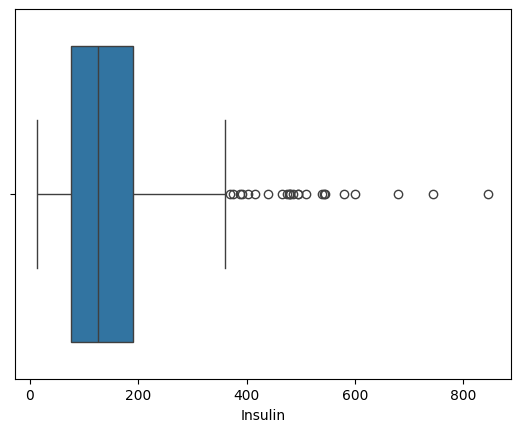

In [42]:
sns.boxplot(data=train, x="Insulin")

In [43]:
desc = train["Insulin"].describe()
desc

,Insulin
count,394.000000
mean,155.548223
std,118.775855
min,14.000000
25%,76.250000
50%,125.000000
75%,190.000000
max,846.000000


In [44]:
# IQR =  3IQR - 1IQR
# OUT > 3IQR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [45]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [46]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(394, 9)


(370, 9)


## 학습, 예측에 사용할 컬럼

In [14]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 정답값이자 예측해야 될 값

In [47]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Insulin"
label_name

'Insulin'

## 학습, 예측 데이터셋 만들기

In [48]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
X_train.shape

(370, 8)

In [49]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(370,)

In [50]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [51]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
            RandomForestRegressor(random_state=42),
            GradientBoostingRegressor(random_state=42)]

estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [105]:
results = [ ]
for estimator in estimators:
    result = [ ]
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [100]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([10, 21,  5, 29,  8, 11, 21,  7, 23, 20])

In [106]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.40061413, 0.92737025, 0.6311534 , 0.41316997, 0.59615714,
       0.38423977, 0.99024886, 0.52604317, 0.70937116, 0.74529032])

In [107]:
from sklearn.model_selection import RandomizedSearchCV
results = [ ]
for estimator in estimators:
    result = [ ]

    max_depth = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)

    param_distributions = {"max_depth" : max_depth,
    "max_features" : max_features}

    regressor = RandomizedSearchCV(estimator,
    param_distributions,
    n_iter=10,
    scoring=None,
    n_jobs=None,
    cv=5,
    verbose=2, random_state=42)

regressor.fit(X_train, y_train)

result.append(estimator.__class__.__name__)
result.append(regressor.best_params_)
result.append(regressor.best_estimator_)
result.append(regressor.best_score_)
result.append(regressor.cv_results_)
results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=26, max_features=0.5903845548573263; total time=   0.3s
[CV] END ......max_depth=26, max_features=0.5903845548573263; total time=   0.3s
[CV] END ......max_depth=26, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=26, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=26, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=29, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=29, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=29, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=29, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=29, max_features=0.5903845548573263; total time=   0.2s
[CV] END ......max_depth=20, max_features=0.3893838705273005; total time=   0.2s
[CV] END ......max_depth=20, max_features=0.3893

In [108]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "best_params", "best_estimator", "best_score", "cv_results"]
df_cv

,model,best_params,best_estimator,best_score,cv_results
0,GradientBoostingRegressor,"{'max_features': 0.7469744943730565, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.300244,"{'mean_fit_time': [0.2479762077331543, 0.21684..."


In [114]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

KeyError: 'estimator'

In [75]:
regressor.best_params_

{'max_features': np.float64(0.5481489981266422), 'max_depth': np.int64(5)}

In [76]:
regressor.best_estimator_

DecisionTreeRegressor(max_depth=np.int64(5),
                      max_features=np.float64(0.5481489981266422),
                      random_state=42)

In [77]:
regressor.cv_results_

{'mean_fit_time': array([0.00658855, 0.00430079, 0.00421863, 0.01247745, 0.00695958,
        0.00598903, 0.00704832, 0.01131301, 0.00508981, 0.00503387]),
 'std_fit_time': array([1.09346466e-03, 8.29850654e-05, 1.20671969e-04, 4.29703331e-03,
        1.04667821e-03, 3.40534518e-05, 2.65512003e-03, 3.51316781e-03,
        9.46121588e-05, 1.36853311e-04]),
 'mean_score_time': array([0.00285935, 0.00276737, 0.00253286, 0.00599837, 0.00280671,
        0.00280046, 0.0039887 , 0.00546565, 0.00261016, 0.00262227]),
 'std_score_time': array([1.40298182e-04, 1.92881921e-04, 7.56652980e-05, 1.10517423e-03,
        3.49828876e-05, 6.60325639e-05, 1.64231137e-03, 2.52484637e-03,
        8.91156728e-05, 9.84241564e-05]),
 'param_max_features': masked_array(data=[0.5481489981266422, 0.5481489981266422,
                    0.45709017039606004, 0.6284880041028208,
                    0.9892484133472392, 0.9413254057772722,
                    0.33778953664487, 0.45709017039606004,
                    

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [113]:
best_estimator.fit(X_train, y_train)

NameError: name 'best_estimator' is not defined

## cross validation 으로 학습 세트의 오차 측정하기

In [115]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

NameError: name 'best_estimator' is not defined

In [54]:
# 정답을 정확하게 맞춘 갯수
(y_predict == y_train).sum()

np.int64(7)

In [24]:
len(y_train)

394

<Axes: xlabel='Insulin'>

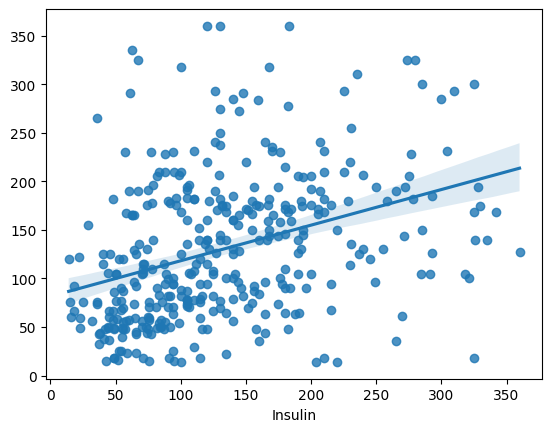

In [116]:
# regplot 으로 결과 값을 비교합니다.

sns.regplot(x=y_train, y=y_predict)

In [117]:
# r2_score 를 구합니다.

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

-0.28551906710833275

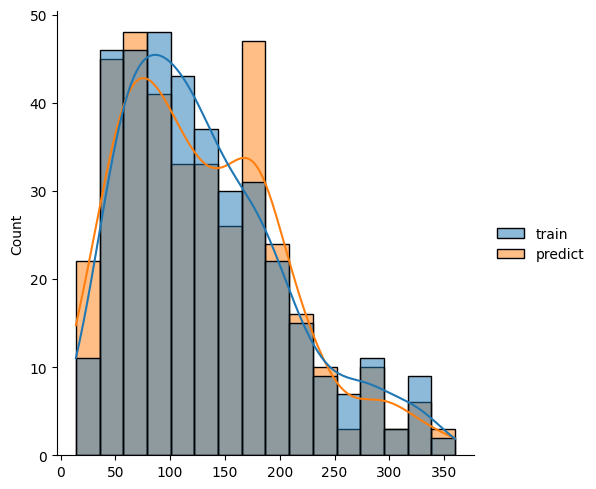

In [118]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

# sns.distplot(y_train, hist=False, label="train")
# sns.distplot(y_predict, hist=False, label="predict")

sns.displot(data=pd.DataFrame({"train": y_train, "predict": y_predict}),  kde=True)

## 오차 구하기

In [119]:
# MAE
# 86
# 77.55
# 62.05
# 44
error = abs(y_train - y_predict)
error.mean()

np.float64(62.056756756756755)

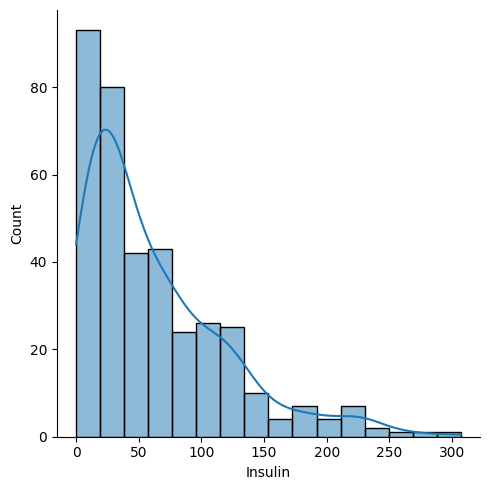

In [58]:
# sns.distplot(error)
sns.displot(error, kde=True)

In [59]:
error.describe()

,Insulin
count,370.000000
mean,62.056757
std,56.854443
min,0.000000
25%,19.250000
50%,42.500000
75%,89.750000
max,307.000000


In [31]:
# RMSE
# 126.895
# 114.077 (Insulin<600)
# 84
# 59.68
np.sqrt(((y_train - y_predict) ** 2).mean())

np.float64(126.89512636995443)

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.
* 피처의 중요도를 구합니다.

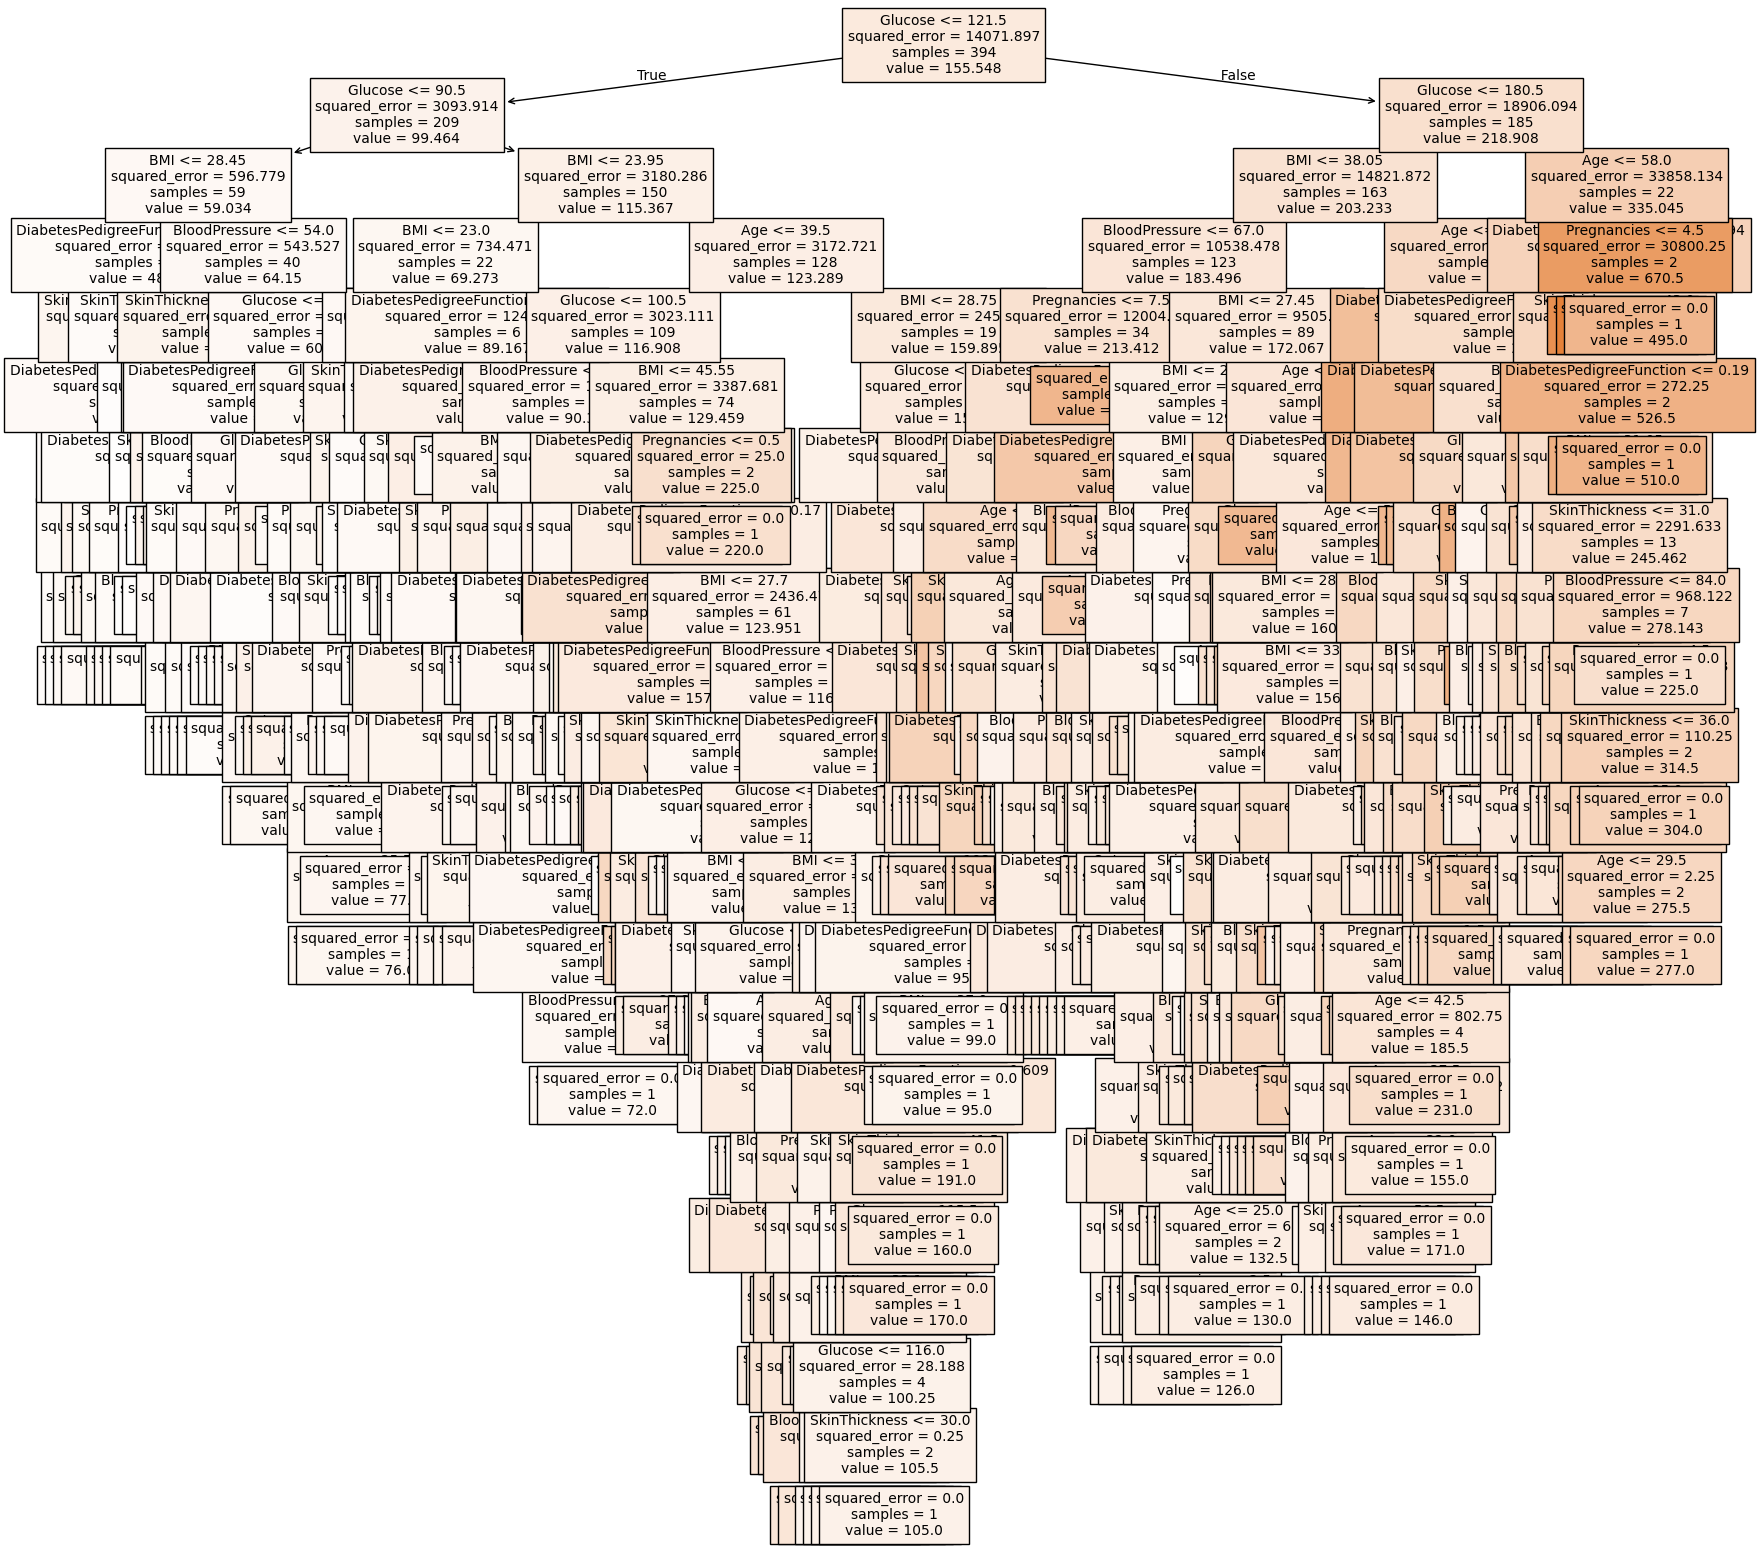

In [32]:
# plot_tree로 시각화 하기

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
          feature_names=feature_names,
          filled=True,
          fontsize=10)

In [120]:
# 피처의 중요도를 추출하기
best_estimator.feature_importances_

NameError: name 'best_estimator' is not defined

In [121]:
# 피처의 중요도 시각화 하기
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

NameError: name 'best_estimator' is not defined

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [122]:
y_test = best_estimator.predict(X_test)
y_test[:5]

NameError: name 'best_estimator' is not defined

In [62]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [63]:
test["Insulin"] = y_test

In [64]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,124.906780,80.878263,18.0,64.00,97.5,155.0,335.0
1,138.0,163.724638,83.718835,14.0,96.75,145.0,215.0,328.0


<Axes: xlabel='Outcome', ylabel='Insulin'>

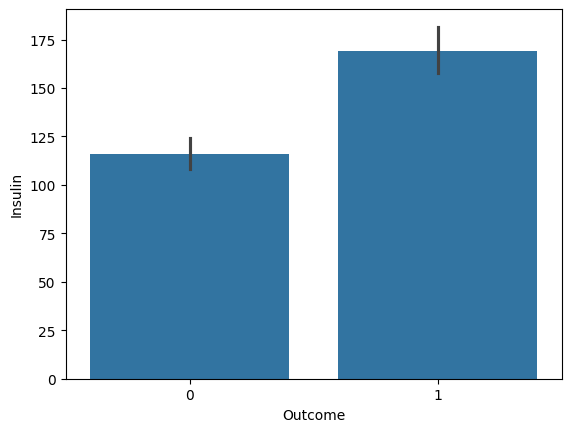

In [65]:
# Insulin 평균값을 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<Axes: xlabel='Outcome', ylabel='Insulin'>

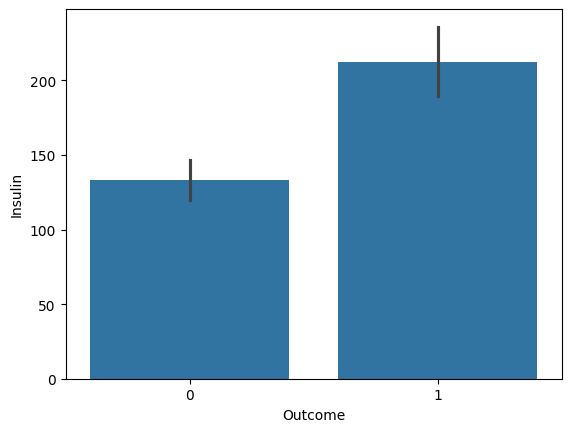

In [60]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")

In [123]:
df.loc[df["Insulin"] == 0, "Insulin"]

,Insulin
0,0
1,0
2,0
5,0
7,0
...,...
761,0
762,0
764,0
766,0


In [124]:
test["Insulin"]

,Insulin
0,168.0
1,37.0
2,130.0
5,215.0
7,165.0
...,...
761,328.0
762,94.0
764,325.0
766,22.0


In [125]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

In [127]:
df.to_csv("C:\Users\유현승\Desktop\data//diabetes_fill_insulin.csv", index=False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (ipython-input-3600340512.py, line 1)

In [128]:
pd.read_csv("data/diabetes_fill_insulin.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/diabetes_fill_insulin.csv'